# Alive & Thrive
## Viet Nam Data: Women Files - Charts
## Prepared by Aaron Wise; aaron@a3di.dev
### Version: 12 July 2022

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from tabulate import read_csv_file, create_bivariate_var_dep, create_reduced_df
from aw_analytics import mean_wt

In [33]:
# Set parameters
country = 'VNM'
recode = 'women'

In [34]:
# Read in combined file
df = read_csv_file(country, recode, file_type='combined')

# Create updated bivariate variables (mother_edu_biv, eth_hoh_biv)
df = create_bivariate_var_dep(df)

The file -- VNM_women_combined.csv -- has the following shape: Rows: 5986; Columns: 22


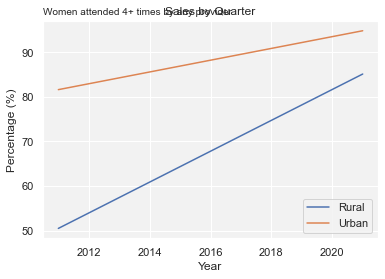

In [86]:
# --- Create chart

## Drop unwanted columns and rows
var_dep = ['anc_4_visits']
ind_var = ['residence']
var_year = ['Year']
weight = ['wmweight']

reduced_df, _ = create_reduced_df(df, var_dep, ind_var, var_year, weight)

## Generate chart

### Set seaborn parameters
sns.set_theme()
sns.set_style("darkgrid", {"axes.facecolor": ".95"})


g = sns.lineplot(
    x = var_year[0],
    y = var_dep[0],
    data = reduced_df.groupby([var_year[0], ind_var[0]]).apply(mean_wt, var_dep[0], wt = weight[0]).to_frame(var_dep[0]),
    hue = ind_var[0],
    palette="deep"
    )

g.set(xlabel = 'Year',
       ylabel = 'Percentage (%)',
       title='Sales by Quarter')

plt.title('Women attended 4+ times by any provider', loc="left", fontsize = 10, )

plt.legend(loc='lower right')
